<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Risk_measurement_with_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation



In [112]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

top_features = ['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.f.F4.h.T3',
                   'AB.C.alpha.q.T6', 'AB.B.theta.c.F7']
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

Y = data1['specific_disorder']
X = data1[top_features]

Y = data1['specific_disorder'] == 5

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.648650
         Iterations 5


In [113]:
risk = 0

In [114]:
#Delta AF7-AF8 coherence - corresponds to COH.A.delta.a.FP1.b.FP2

from scipy import signal

data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')

channel_1 = data['Delta_AF8'].values
channel_2 = data['Delta_AF7'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF7DeltaAF8': Cxy})

coherence_AF8_AF7 = coherence_data['Coherence DeltaAF7DeltaAF8'].mean()
coherence_AF8_AF7 *=100
print(coherence_AF8_AF7)




#Delta AF8-TP9 coherence - corresponds to COH.A.delta.f.F4.h.T3

from scipy import signal

data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')

channel_1 = data['Delta_AF8'].values
channel_2 = data['Delta_TP9'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF8DeltaTP9': Cxy})

coherence_AF8_TP9 = coherence_data['Coherence DeltaAF8DeltaTP9'].mean()
coherence_AF8_TP9 *=100
print(coherence_AF8_TP9)

<ipython-input-114-8cbb441a2402>:5: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


13.365575864956632
13.916182133081339


<ipython-input-114-8cbb441a2402>:29: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


                                0         1
const                   -0.194671  0.365922
COH.A.delta.a.FP1.b.FP2  0.002061  0.009593


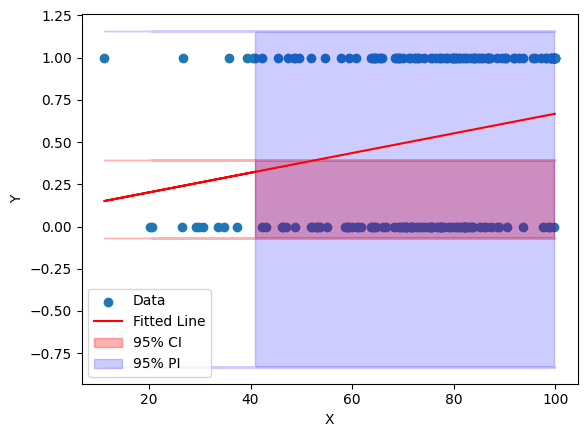

-0.33649449183662145


In [115]:
#COH.A.delta.a.FP1.b.FP2
Y = data1['specific_disorder'] == 5
X = data1['COH.A.delta.a.FP1.b.FP2']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(Y, X_with_const)
result = logit_model.fit()

prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.b.FP2': [coherence_AF8_AF7]})

pred = result.get_prediction(prediction_data)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

# Plot the data
plt.scatter(X, Y, label='Data') #y changed to Y

plt.plot(X, result.fittedvalues, color='red', label='Fitted Line')
plt.fill_between(X, ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
plt.fill_between(X, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% PI')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

risk1 = pred.predicted_mean[0]
if risk1<0.5:
  risk1 = (0.5-risk1) * -1
else:
  risk1 = (risk1-0.5)
print(risk1)

                              0         1
const                  0.379588  0.686546
COH.A.delta.f.F4.h.T3 -0.005858  0.003865


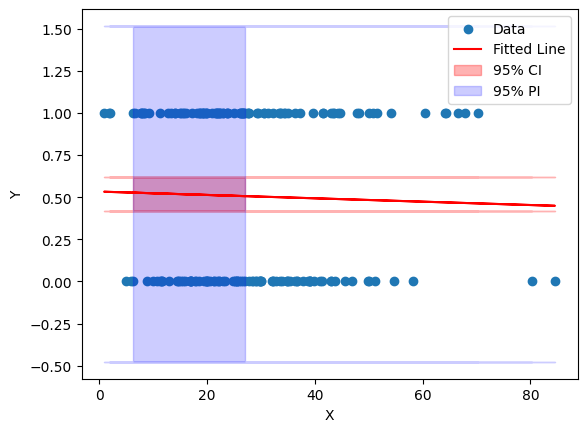

0.019201409656515955


In [116]:
#COH.A.delta.f.F4.h.T3
Y = data1['specific_disorder']
X = data1['COH.A.delta.f.F4.h.T3']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.f.F4.h.T3': [coherence_AF8_TP9]})

pred = result.get_prediction(prediction_data)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

# Plot the data
plt.scatter(X, y, label='Data')

plt.plot(X, result.fittedvalues, color='red', label='Fitted Line')
plt.fill_between(X, ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
plt.fill_between(X, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% PI')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

risk2 = pred.predicted_mean[0]
if risk2<0.5:
  risk2 = (0.5-risk2) * -1
else:
  risk2 = (risk2-0.5)
print(risk2)

                        0         1
const            0.373138  0.554608
AB.C.alpha.q.T6 -0.000757  0.005270


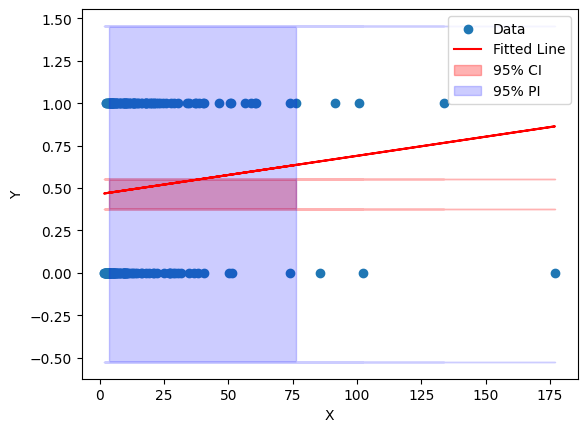

-0.034825004381201174


In [117]:
#AB.C.alpha.q.T6
Y = data1['specific_disorder']
X = data1['AB.C.alpha.q.T6']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.DataFrame({'const': [1], 'AB.C.alpha.q.T6': [data['Delta_TP10'].mean()]})


pred = result.get_prediction(prediction_data)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

# Plot the data
plt.scatter(X, y, label='Data')

plt.plot(X, result.fittedvalues, color='red', label='Fitted Line')
plt.fill_between(X, ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
plt.fill_between(X, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% PI')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

risk3 = pred.predicted_mean[0]
if risk3<0.5:
  risk3 = (0.5-risk3) * -1
else:
  risk3 = (risk3-0.5)
print(risk3)

                        0         1
const            0.409949  0.673199
AB.B.theta.c.F7 -0.015275  0.007704


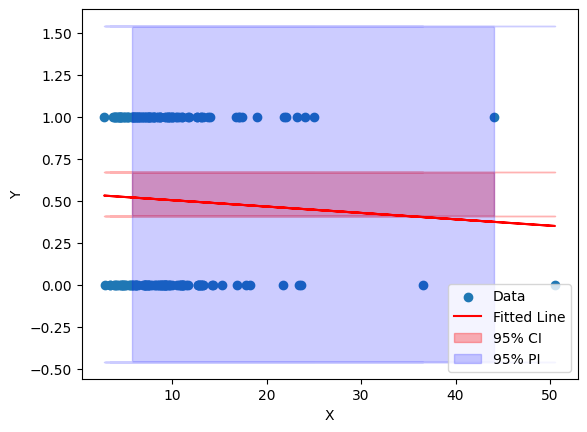

0.04096829247727929


In [118]:
#AB.B.theta.c.F7
Y = data1['specific_disorder']
X = data1['AB.B.theta.c.F7']

y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.OLS(y, X_with_const)
result = logit_model.fit()

prediction_data = pd.DataFrame({'const': [1], '#AB.B.theta.c.F7': [data['Theta_AF7'].mean()]})


pred = result.get_prediction(prediction_data)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']
conf_intervals = result.conf_int()
print(conf_intervals)

# Plot the data
plt.scatter(X, y, label='Data')

plt.plot(X, result.fittedvalues, color='red', label='Fitted Line')
plt.fill_between(X, ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
plt.fill_between(X, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% PI')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

risk4 = pred.predicted_mean[0]
if risk4<0.5:
  risk4 = (0.5-risk4) * -1
else:
  risk4 = (risk4-0.5)
print(risk4)

In [119]:
#INCORRECT SHOULDN't SUBTRACT FROM 0.5 AGAIN

risk = risk1 + risk2 + risk3 + risk4
print(risk)
if risk > 0.5:
  prediction_val = (risk-0.5)*100
  print("You are " + str(prediction_val) + "% more likely to have behavioral disorder")

else:
  prediction_val = (0.5-(risk))*100
  print("You are " + str(prediction_val) + " % less likely to have behavioral disorder")

-0.3111497940840274
You are 81.11497940840273 % less likely to have behavioral disorder


In [122]:
risk = risk1 + risk2 + risk3 + risk4
print(risk)
if risk > 0:
  prediction_val = (risk)*100
  print("You are " + str(prediction_val) + "% more likely to have behavioral disorder")

else:
  prediction_val = (risk)*100
  print("You are " + str(prediction_val*-1) + " % less likely to have behavioral disorder")



-0.3111497940840274
You are 31.11497940840274 % less likely to have behavioral disorder
